In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv('D1.csv')


##Q1
#change the data type to object(admission_type_id , discharge_disposition_id, admission_source_id)
df['admission_type_id'] = df['admission_type_id'].astype(str)
df['discharge_disposition_id'] = df['discharge_disposition_id'].astype(str)
df['admission_source_id'] = df['admission_source_id'].astype(str)
df['encounter_id'] = df['encounter_id'].astype(str)
df['patient_nbr'] = df['patient_nbr'].astype(str)
print(type('admission_type_id'))
print(type('discharge_disposition_id'))
print(type('admission_source_id'))
print(type('encounter_id'))
print(type('patient_nbr'))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [2]:
print(df['gender'].value_counts())
#there are 3 unknow in gender, delete it
df = df.drop(df[df['gender']== "Unknown/Invalid"].index)

#change data type to binary(gender, change, diabetesMed)
gender_map = {'Female':0, 'Male':1}
df['gender'] = df['gender'].map(gender_map)
print(df['gender'].value_counts())

Female             27718
Male               24044
Unknown/Invalid        4
Name: gender, dtype: int64
0    27718
1    24044
Name: gender, dtype: int64


In [3]:
change_map = {'No':0, 'Ch':1}
df['change'] = df['change'].map(change_map)
diabetesMed_map = {'No':0, 'Yes':1}
df['diabetesMed'] = df['diabetesMed'].map(diabetesMed_map)
print(df['change'].value_counts())
print(df['diabetesMed'].value_counts())

1    26660
0    25102
Name: change, dtype: int64
1    40981
0    10781
Name: diabetesMed, dtype: int64


In [4]:
##Q2
#1calculate the mean and median to Identify and report the skewness present in the variables. 
import numpy as np 
df_num = df.select_dtypes(include=[np.number]) 
df_mean = df_num.mean().round(1)
df_median = df_num.median()
df_skeness = df_mean-df_median
df_skeness
# (mean - median) if > 0 positive <0 negative 

gender                0.5
time_in_hospital      1.2
num_lab_procedures   -1.1
num_procedures        0.3
num_medications       0.7
number_outpatient     0.5
number_emergency      0.3
number_inpatient      0.7
number_diagnoses     -1.1
change               -0.5
diabetesMed          -0.2
dtype: float64

In [5]:
# 2. firstly, we find the data errors in the excel, and we use value_count() function to identify what errors exist in each column
pd.set_option('display.max_rows', 1000)
#race
print(df['race'].value_counts())
#age
print(df['age'].value_counts())
#weight
print(df['weight'].value_counts())
#payer_code
print(df['payer_code'].value_counts())
#medical_specialty
print(df['medical_specialty'].value_counts())
#diag_1
print(df['diag_1'].value_counts())
#diag_2
print(df['diag_2'].value_counts())
#diag_3
print(df['diag_3'].value_counts())
#chlorpropamide
print(df['chlorpropamide'].value_counts())


Caucasian          40386
AfricanAmerican     8070
Hispanic            1018
?                   1014
Other                896
Asian                378
Name: race, dtype: int64
[70-80)     12971
[60-70)     11617
[80-90)      9670
[50-60)      8481
[40-50)      4619
[30-40)      1717
[90-100)     1616
[20-30)       815
[10-20)       223
[0-10)         23
?              10
Name: age, dtype: int64
?            50427
[75-100)       542
[50-75)        347
[100-125)      309
[125-150)       72
[25-50)         29
[150-175)       18
[0-25)          11
[175-200)        5
>200             2
Name: weight, dtype: int64
MC    23045
?      7601
HM     4702
SP     3808
BC     3164
MD     2537
CP     1799
CM     1696
UN     1192
OG      879
PO      511
DM      412
CH      127
WC      100
OT       83
MP       79
SI       26
FR        1
Name: payer_code, dtype: int64
?                                    32201
Emergency/Trauma                      5616
InternalMedicine                      3854
Family/Gen

In [6]:
#3.
#a
df_a=df.loc[(df['gender']== 0)& (df['readmitted']=='<30')]
df_a_mean = df_a['time_in_hospital'].mean()
df_a_mean

4.524752475247524

In [7]:
#b
df_age_groups = df['age'].value_counts()
df_readmitted = df.loc[df['readmitted'] == '<30']
df_age_groups_readmitted = df_readmitted['age'].value_counts()
(df_age_groups_readmitted/df_age_groups).sort_values(ascending=False)

[20-30)     0.148466
[90-100)    0.119431
[80-90)     0.116856
[70-80)     0.110631
[60-70)     0.109667
[30-40)     0.108911
[40-50)     0.101970
[50-60)     0.092914
[10-20)     0.067265
?                NaN
[0-10)           NaN
Name: age, dtype: float64

In [8]:
# c
df_r = df.loc[(df['readmitted']!= 'NO')]
df_r1 = df_r[["age","readmitted"]].groupby(['age']).count().sort_values('readmitted', ascending = False)
df_r1

,readmitted
age,
[70-80),6202
[60-70),5348
[80-90),4741
[50-60),3692
[40-50),2008
[30-40),709
[90-100),676
[20-30),351
[10-20),91


In [9]:
#d
df_r3 = df_r[["race","readmitted"]].groupby(['race']).count().sort_values('readmitted', ascending = False) 
df_r3

,readmitted
race,
Caucasian,19119
AfricanAmerican,3530
?,367
Other,347
Hispanic,344
Asian,120


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51762 entries, 0 to 51765
Data columns (total 37 columns):
encounter_id                51762 non-null object
patient_nbr                 51762 non-null object
race                        51762 non-null object
gender                      51762 non-null int64
age                         51762 non-null object
weight                      51762 non-null object
admission_type_id           51762 non-null object
discharge_disposition_id    51762 non-null object
admission_source_id         51762 non-null object
time_in_hospital            51762 non-null int64
payer_code                  51762 non-null object
medical_specialty           51762 non-null object
num_lab_procedures          51762 non-null int64
num_procedures              51762 non-null int64
num_medications             51762 non-null int64
number_outpatient           51762 non-null int64
number_emergency            51762 non-null int64
number_inpatient            51762 non-null int64

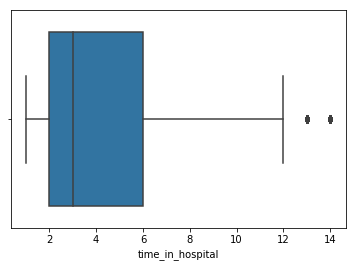

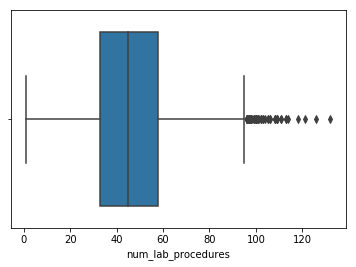

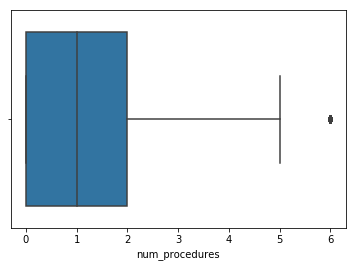

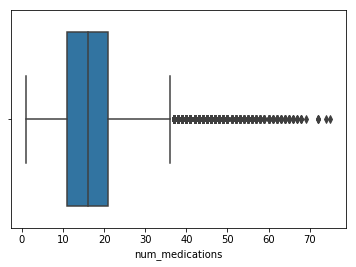

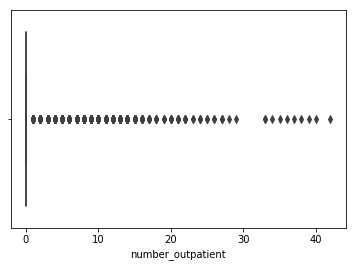

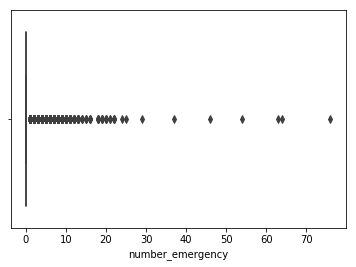

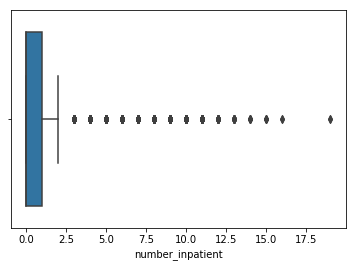

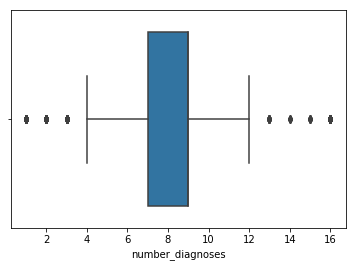

In [10]:
##Q3
# 1.show all columns information (int use box chart,object use bar chart)
print(df.info())
#box chart 
box_time_in_hospital = sns.boxplot(df['time_in_hospital'])
plt.show()
box_num_lab_procedures = sns.boxplot(df['num_lab_procedures'])
plt.show()
box_num_procedures = sns.boxplot(df['num_procedures'])
plt.show()
box_num_medications = sns.boxplot(df['num_medications'])
plt.show()
box_number_outpatient = sns.boxplot(df['number_outpatient'])
plt.show()
box_number_emergency = sns.boxplot(df['number_emergency'])
plt.show()
box_number_inpatient = sns.boxplot(df['number_inpatient'])
plt.show()
box_number_diagnoses = sns.boxplot(df['number_diagnoses'])
plt.show()

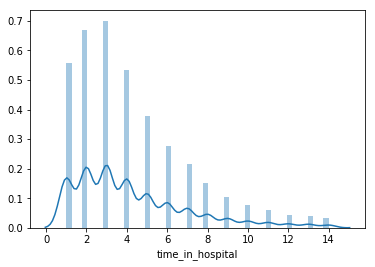

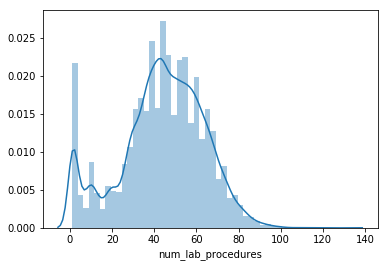

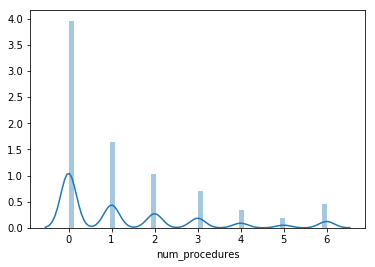

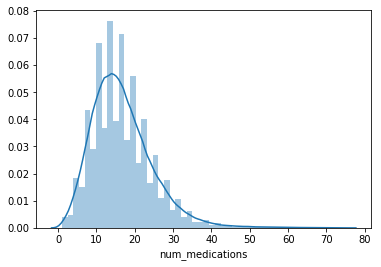

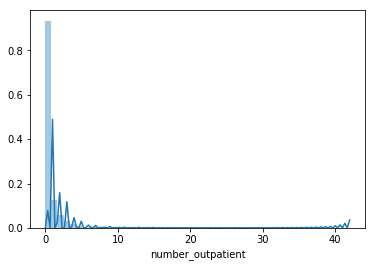

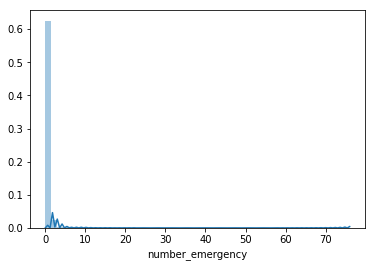

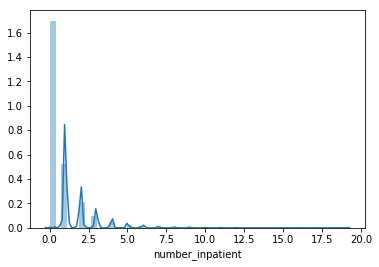

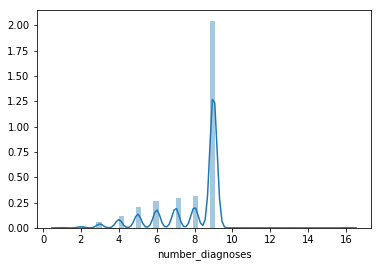

In [11]:
#distplot
import warnings
warnings.filterwarnings("ignore")
# dg = sns.distplot(df['time_in_hospital'])
dis_time_in_hospital = sns.distplot(df['time_in_hospital'])
plt.show()
dis_num_lab_procedures = sns.distplot(df['num_lab_procedures'])
plt.show()
dis_num_procedures = sns.distplot(df['num_procedures'])
plt.show()
dis_num_medications = sns.distplot(df['num_medications'])
plt.show()
dis_number_outpatient = sns.distplot(df['number_outpatient'])
plt.show()
dis_number_emergency = sns.distplot(df['number_emergency'])
plt.show()
dis_number_inpatient = sns.distplot(df['number_inpatient'])
plt.show()
dis_number_diagnoses = sns.distplot(df['number_diagnoses'])
plt.show()

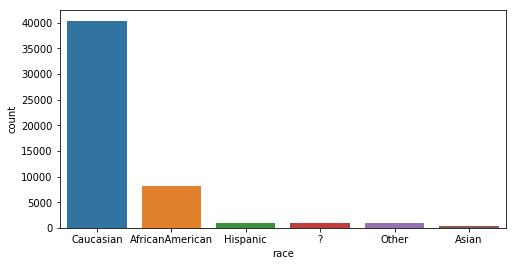

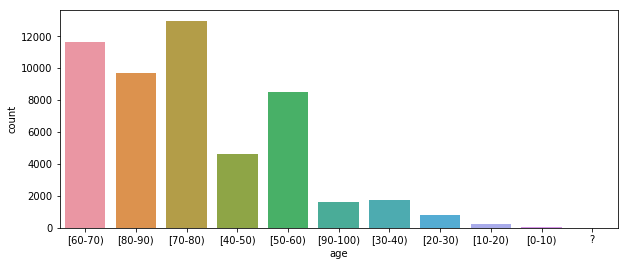

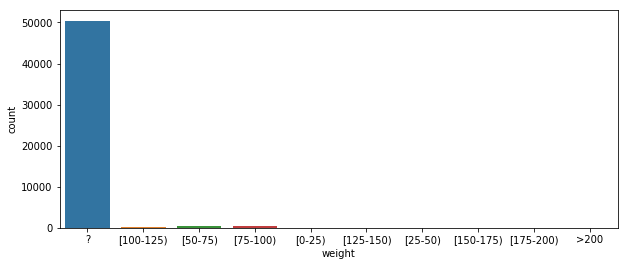

In [12]:
#bar chart for categories 

#race
plt.figure(figsize=(8,4))
count_race = sns.countplot(data=df, x='race')
plt.show()
#age
plt.figure(figsize=(10,4))
count_race = sns.countplot(data=df, x='age')
plt.show()
#weight
plt.figure(figsize=(10,4))
count_race = sns.countplot(data=df, x='weight')
plt.show()

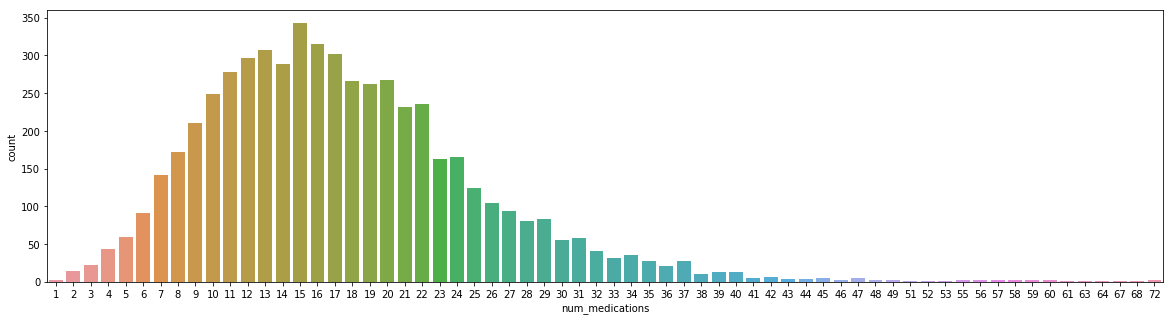

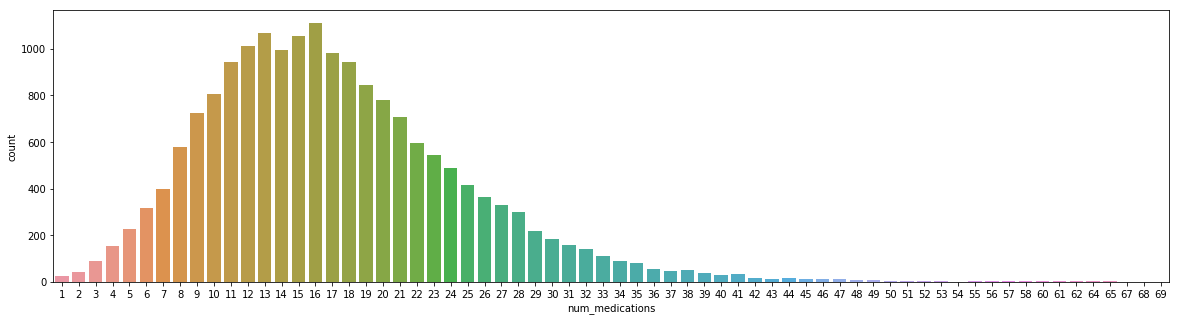

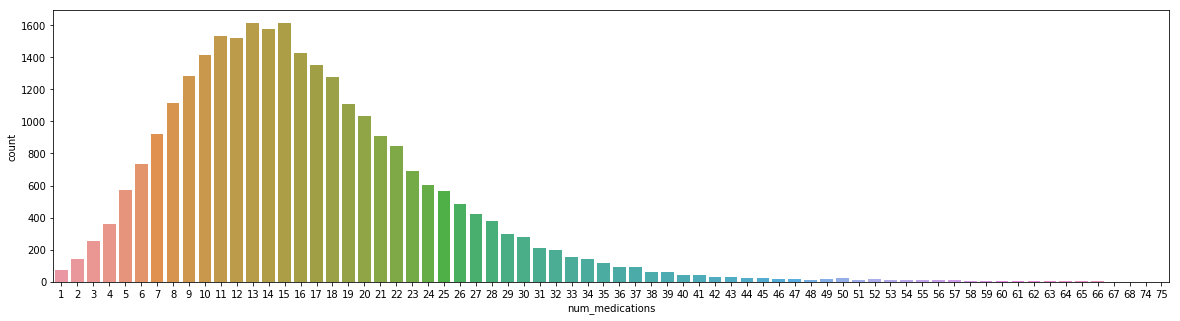

In [13]:
df_a=df.loc[(df['readmitted']=='<30')]
plt.figure(figsize=(20,5))
count_race = sns.countplot(data=df_a, x='num_medications')
plt.show()

df_b=df.loc[(df['readmitted']=='>30')]
plt.figure(figsize=(20,5))
count_race = sns.countplot(data=df_b, x='num_medications')
plt.show()


df_c=df.loc[(df['readmitted']=='NO')]
plt.figure(figsize=(20,5))
count_race = sns.countplot(data=df_c, x='num_medications')
plt.show()

In [14]:
# readmitted mapping
readmitted_map = {'<30':0, '>30':1,'NO':2}
df['readmitted'] = df['readmitted'].map(readmitted_map)

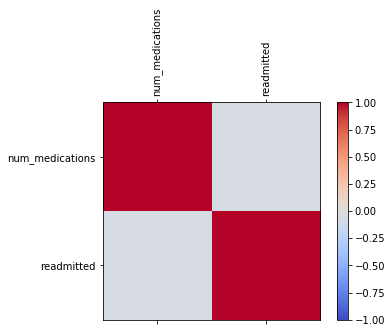

In [15]:
df2 = df[['num_medications','readmitted']]
corr_med_readmitted = df2.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr_med_readmitted,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df2.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df2.columns)
ax.set_yticklabels(df2.columns)
plt.show()

In [16]:
df_med_re = df[['num_medications','readmitted']]
corr = df_med_re.corr()
corr

,num_medications,readmitted
num_medications,1.000000,-0.054495
readmitted,-0.054495,1.000000


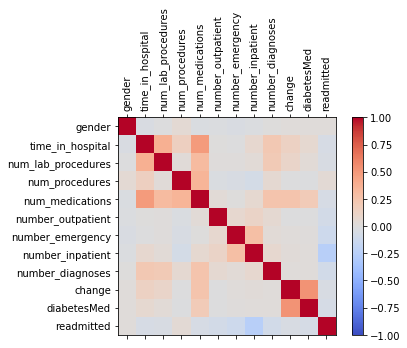

In [17]:
# #3
df_num = df.select_dtypes(include=[np.number]) 
corr_all = df_num.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr_all,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_num.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_num.columns)
ax.set_yticklabels(df_num.columns)
plt.show()

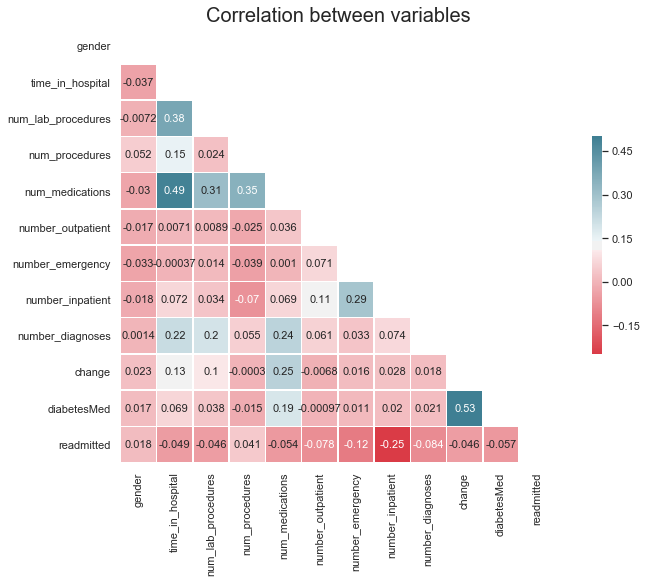

In [18]:
sns.set(style='white')

mask = np.zeros_like(corr_all, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(13,8))

cmap = sns.diverging_palette(10,220, as_cmap=True)

ax = sns.heatmap(corr_all, mask=mask, 
                 cmap=cmap, vmax= .5, annot=True, annot_kws= {'size':11}, 
                 square=True, xticklabels=True, yticklabels=True, linewidths=.5, 
                 cbar_kws={'shrink': .5}, ax=ax)

ax.set_title('Correlation between variables', fontsize=20);

In [19]:
###Q4
##1. 
##2.
#check the Percentage of missing data
mask1 = df['race'] == "?"
df.loc[mask1, 'race'] = np.nan
race_na = df["race"].isnull().sum()*100/len(df)
print("race_na ="+str(race_na))#1.95

mask2 = df['weight'] == "?"
df.loc[mask2, 'weight'] = np.nan
weight_na = df["weight"].isnull().sum()*100/len(df)
print("weight_na ="+str(weight_na))#97

mask3 = df['age'] == "?"
df.loc[mask3, 'age'] = np.nan
age_na = df["age"].isnull().sum()*100/len(df)
print("age_na ="+str(age_na))#0.019

mask4 = df['payer_code'] == "?"
df.loc[mask4, 'payer_code'] = np.nan
payer_code_na = df["payer_code"].isnull().sum()*100/len(df)
print("payer_code_na ="+str(payer_code_na))#14.68

mask5 = df['medical_specialty'] == "?"
df.loc[mask5, 'medical_specialty'] = np.nan
medical_specialty_na = df["medical_specialty"].isnull().sum()*100/len(df)
print("medical_specialty_na ="+str(medical_specialty_na))#62

mask6 = df['diag_1'] == "?"
df.loc[mask6, 'diag_1'] = np.nan
diag_1_na = df["diag_1"].isnull().sum()*100/len(df)
print("diag_1_na ="+str(diag_1_na))#0.01

mask7 = df['diag_2'] == "?"
df.loc[mask7, 'diag_2'] = np.nan
diag_2_na = df["diag_2"].isnull().sum()*100/len(df)
print("diag_2_na ="+str(diag_2_na))#0.1

mask8 = df['diag_3'] == "?"
df.loc[mask8, 'diag_3'] = np.nan
diag_3_na = df["diag_3"].isnull().sum()*100/len(df)
print("diag_3_na ="+str(diag_3_na))#0.6

mask9 = df['chlorpropamide'] == "?"
df.loc[mask9, 'chlorpropamide'] = np.nan
chlorpropamide_na = df["chlorpropamide"].isnull().sum()*100/len(df)
print("chlorpropamide_na ="+str(chlorpropamide_na))#0.01

race_na =1.9589660368610178
weight_na =97.42088791004984
age_na =0.019319191685019898
payer_code_na =14.684517599783625
medical_specialty_na =62.209729144932574
diag_1_na =0.019319191685019898
diag_2_na =0.17773656350218306
diag_3_na =0.6568525172906765
chlorpropamide_na =0.01738727251651791


In [20]:
df['race'].fillna(df['race'].mode()[0], inplace=True)
    
df['age'].fillna(df['age'].mode()[0], inplace=True)
    
df['payer_code'].fillna(df['payer_code'].mode()[0], inplace=True)
    
df['diag_1'].fillna(df['diag_1'].mode()[0], inplace=True)
    
df['diag_2'].fillna(df['diag_2'].mode()[0], inplace=True)
    
df['diag_3'].fillna(df['diag_3'].mode()[0], inplace=True)
    
df['chlorpropamide'].fillna(df['chlorpropamide'].mode()[0], inplace=True)
print(df['race'].isnull().sum())
print(df['age'].isnull().sum())
print(df['payer_code'].isnull().sum())
print(df['diag_1'].isnull().sum())
print(df['diag_2'].isnull().sum())
print(df['diag_3'].isnull().sum())
print(df['chlorpropamide'].isnull().sum())

0
0
0
0
0
0
0


In [1]:
#defining preparation function
import pandas as pd
import numpy as np
def data_prep():
    #read the dataset
    df = pd.read_csv('D1.csv')
    
    ##data cleaning 
    
    ##correct the data types
    #change the data type to object
    df['admission_type_id'] = df['admission_type_id'].astype(str)
    df['discharge_disposition_id'] = df['discharge_disposition_id'].astype(str)
    df['admission_source_id'] = df['admission_source_id'].astype(str)
    df['encounter_id'] = df['encounter_id'].astype(str)
    df['patient_nbr'] = df['patient_nbr'].astype(str)
    
    #change data type to binary(gender, change, diabetesMed)
    #drop row
    df = df.drop(df[df['gender']== "Unknown/Invalid"].index)
    gender_map = {'Female':0, 'Male':1}
    df['gender'] = df['gender'].map(gender_map)
    
    change_map = {'No':0, 'Ch':1}
    df['change'] = df['change'].map(change_map)

    diabetesMed_map = {'No':0, 'Yes':1}
    df['diabetesMed'] = df['diabetesMed'].map(diabetesMed_map)
    
    
    mask1 = df['race'] == "?"
    df.loc[mask1, 'race'] = np.nan

    mask3 = df['age'] == "?"
    df.loc[mask3, 'age'] = np.nan

    mask4 = df['payer_code'] == "?"
    df.loc[mask4, 'payer_code'] = np.nan

    mask6 = df['diag_1'] == "?"
    df.loc[mask6, 'diag_1'] = np.nan

    mask7 = df['diag_2'] == "?"
    df.loc[mask7, 'diag_2'] = np.nan

    mask8 = df['diag_3'] == "?"
    df.loc[mask8, 'diag_3'] = np.nan

    mask9 = df['chlorpropamide'] == "?"
    df.loc[mask9, 'chlorpropamide'] = np.nan
#Delete more than 50% of the missing columns, encounter_id and patient_nbr are meaningless, so delete them.
    df = df.drop(columns=["medical_specialty","weight","encounter_id","patient_nbr"])     
#imput missing value in mode

    df['race'].fillna(df['race'].mode()[0], inplace=True)
    
    df['age'].fillna(df['age'].mode()[0], inplace=True)
    
    df['payer_code'].fillna(df['payer_code'].mode()[0], inplace=True)
    
    df['diag_1'].fillna(df['diag_1'].mode()[0], inplace=True)
    
    df['diag_2'].fillna(df['diag_2'].mode()[0], inplace=True)
    
    df['diag_3'].fillna(df['diag_3'].mode()[0], inplace=True)
    
    df['chlorpropamide'].fillna(df['chlorpropamide'].mode()[0], inplace=True)
    return df

data_prep().to_csv('D1-processed.csv')